In [1]:
from vectorgebra import *
# VERSION 2.7.3

## Statistics

Vectorgebra has a descent coverage of statistical methods and distributions. These range from basic permutation combination constants to parameter calculation and probabilistic distributions like poisson, gaussian, etc. 

Coefficient calculation is done for 3 different ones. Permutation, combination and multinomial. Calculations are loop based and descent enough speedwise.

In [2]:
print(f"Factorial is the base for all (not in the source code however). 10!: {factorial(10)}")
print(f"Permutations of 7 objects pairwise: {permutation(7, 2)}")
print(f"Amount of 3-member groups that can be created in 9 people group: {combination(9, 3)}")
print(f"Possible permutations of 7 total objects that are formed from 3 and 4 same object groups: {multinomial(7, 4, 3)}")

Factorial is the base for all (not in the source code however). 10!: 3628800
Permutations of 7 objects pairwise: 2520
Amount of 3-member groups that can be created in 9 people group: 84.0
Possible permutations of 7 total objects that are formed from 3 and 4 same object groups: 35.0


Another helpful function is vectorgebra.permutate(). This shall not be confused with vectorgebra.permutation(). The permutate function takes a dataset, returns all its permutations in a list.

In [3]:
group = ["a", "b", "c"]
print(f"All possible permutations:\n{permutate(group)}\n")


All possible permutations:
[['b', 'c', 'a'], ['b', 'a', 'c'], ['c', 'b', 'a'], ['c', 'a', 'b'], ['a', 'c', 'b'], ['a', 'b', 'c']]


Probabilistic distributions arise from all above functions. There are many of them in vectorgebra, but we will just look at the binomial and gaussian/normal distribution. 

We toss a fair coin. After 10 coin tosses, we get 5 heads. The probability of this event can be found with vectorgebra.

In [4]:
print(f"Probability that out of 10 coin tosses, 5 were heads: {binomial(n=10, k=5, p=0.5):.3f}")
# You can modify the "p" argument to simulate non-fair experiments.

Probability that out of 10 coin tosses, 5 were heads: 0.246


Average age in a country is 36. ~%68 of population is between the ages 20 and 52. What are the chances that we are 10 years old?

In [5]:
mu = 36
sigma = 16
print(f"Probability that we are 10 years old: {gaussian(10, mean=mu, sigma=sigma):.5f}")

Probability that we are 10 years old: 0.00666


Probability that we are at most 10 years old can be found with some more steps. We need to find a Z-Score and pass into normal distribution. Then we can use vectorgebra.integral() (We cannot pass mu and sigma to this method, we have to switch to vectorgebra.normal()).
<br>
$z_{10}\:=\:\frac{10 - 36}{16}$
<br>
We will integrate up to this z-score. But starting from where? We need to start from the z-score that corresponds to 0-years old at the first gaussian curve. 
<br>
$z_{0}\:=\:\frac{0-36}{16}$

In [6]:
z_10 = -(26/16)
z_0 = -(36/16)
print(f"Chances that we are at most 10 years old: {integrate(normal, z_0, z_10):.4f}")

Chances that we are at most 10 years old: 0.0404


## Data

Meaningful parameters from data can be obtained via vectorgebra. These include mean, median, variance, etc. (For a full list, see the [github](https://pypi.org/project/vectorgebra/) page.) 

vectorgebra.expectation() and vectorgebra.variance() work with the theoretical approach. You need to put in all possible outcomes as the first positional argument "values", and you need to put in probabilities of those outcomes in order within an iterable as the second positional argument "probabilities".

For vectorgebra.expectation(), you can put in a third positional argument, "moment". This argument lets you calculate any moment of the dataset you want.

In [7]:
sample = (1, 2, 3, 4, 5, 6) 

mu = expectation(sample, [1/6 for k in range(len(sample))])
var = variance(sample, [1/6 for l in range(len(sample))])

print(f"Expectation value of a die roll (should be 3.5): {mu}")
print(f"Variance of a die roll (should be 35/12): {var}")
print(expectation(sample, [1/6 for m in range(len(sample))], moment=2) - mu**2)

    

Expectation value of a die roll (should be 3.5): 3.5
Variance of a die roll (should be 35/12): 2.916666666666666
2.916666666666666


## Fitting Data

There are 3 methods of fitting data into a scheme in vectorgebra. Those are linear regression, polynomial regression and K-Means algorithm. We will cover all 3 here with sample data generation.

### Linear Regression

Linear regression is done with vectorgebra.linear_fit() function. You need to put in the x values, y values, learning rate and the number of iterations. These arguments are put in order. If your dataset is not too large, you may also use the least squares method in vectorgebra.Matrix. Use the Gauss-Jordan inversion method. Since vectorgebra.linear_fit requires a tuning of the learning rate (for almost all usages), if you are not working on databases least squares will work better.

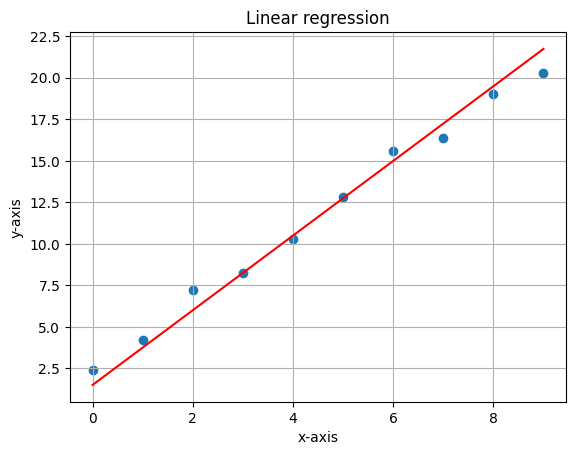

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

line = lambda x: 2 * x + 3   # Same line

x_data = [k for k in range(10)]
y_data = [(line(x) + random.uniform(-1, 1)) for x in x_data]

b0, b1 = linear_fit(x_data, y_data, rate=0.031)

plt.scatter(x_data, y_data)

plt.plot(x_data, [b0 + x*b1 for x in x_data], color="red")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Linear regression")
plt.grid()
plt.show()

Adjusting the learning rate is the key to better data fitting here. These methods are more primitive stochastic gradient descent methods. They do not have helper functions. So they do not let you modify the learning rate at each iteration. This will become important later on for the [MLgebra](https://pypi.org/project/mlgebra/) library. There you can modify the learning rate at each iteration as you wish.

vectorgebra.linear_fit() returns a tuple of (b0, b1). 

Subtracting the y(0) value from all dataset allows you to get more accurate results. You need to add this value to the lines b0 after the fitting, however.

This function has decimal.Decimal support. Default value of "rate" is decimal.Decimal. 

### Polynomial Regression

vectorgebra.general_fit() lets you fit the data in n-degree polynomials. In addition to all vectorgebra.linear_fit()'s arguments, it has a "degree" argument that is the last positional argument. Its default is 1, where it is just a linear regression with extra steps.

Adjusting the learning rate is still done manually. Keep in mind that as the degree increases, learning rate must be lowered.

This function has no overfitting protection, but it won't. It is not precise enough.

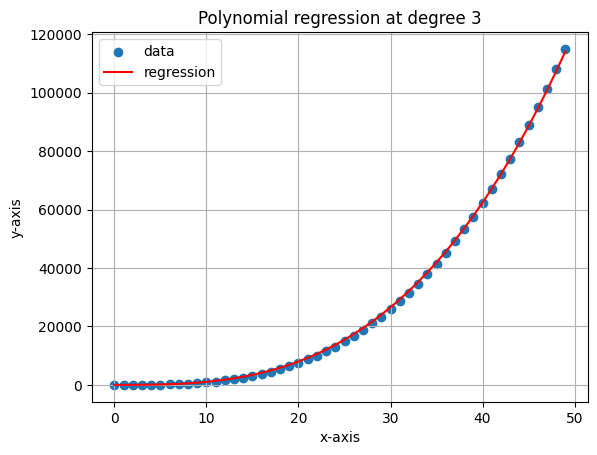

In [38]:
polynomial = lambda x: x**3 - x**2 - 5*x + 1

x_data = [k for k in range(50)]
y_data = [polynomial(x) + random.uniform(-0.1*x, 0.1*x)  for x in x_data]

coef = general_fit(x_data, y_data, degree=3, rate=0.0000000001)

y_res = [coef.dot(Vector(*[pow(x, n) for n in range(4)])) for x in x_data]

plt.scatter(x_data, y_data, label="data")
plt.plot(x_data, y_res, color="red", label="regression")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Polynomial regression at degree 3")
plt.legend()
plt.grid()
plt.show()

vectorgebra.general_fit() returns a vectorgebra.Vector of coefficients in ascending order of degree. Dot product is the easiest way of producing y values from this vector. 

For higher degrees, you may need to switch to decimal.Decimal valued rates and data for better accuracy. The default already is a decimal.Decimal.

If you don't get good results with this function, try increasing the "degree". Some data are not inherently polynomial, they can be represented with transcendental and alike functions. You need to approach to their Taylor series in that case. This would require high "degree" values even though it doesn't seem like it.

### K-Means

Fitting data into groups is done via vectorgebra.kmeans(). Dataset is given in a bulk, both with x and y values. Amount of points to group on is given via "k" argument, whose default is 2. You can also control the amount of iterations via "iterations". Starting points' coordinates are generated randomly. "a" and "b" arguments limit the generation interval.

This function returns a tuple. First element of the tuple is a list which has all k points' coordinates as vectors. Second element is another list of k sublists. Each sublist corresponds to the same indexed point. Therefore, the data is grouped by points in order.

Given dataset's elements must be same dimensional, each elements type must be the same as the first element, preferably vectorgebra.Vector. Otherwise, they will be converted to it. Defining the data on vectorgebra.Vector will make this function work faster.

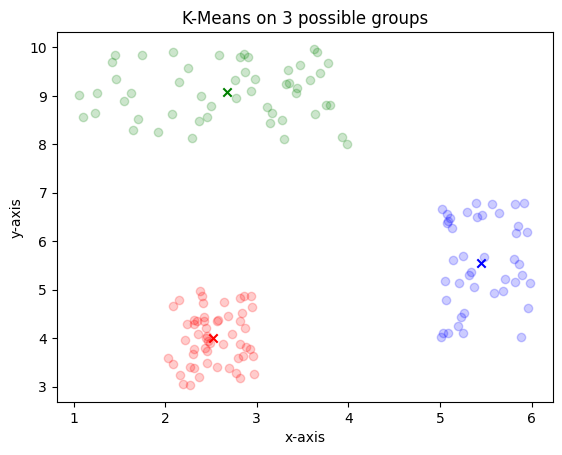

In [50]:
dataset = []

sample = (((2, 3), (3, 5)), ((1, 4), (8, 10)), ((5, 6), (4, 7)))

for k in range(150):
    limiter_pair = random.choice(sample)
    dataset.append(Vector(random.uniform(*limiter_pair[0]), random.uniform(*limiter_pair[1])))
    # So the dataset is created shuffled

points, groups = kmeans(dataset, k=3, a=3.5, b=4.5)
p0 = points[0]
p1 = points[1]
p2 = points[2]
plt.scatter(p0[0], p0[1], color="red", marker="x")
x_values = [k[0] for k in groups[0]]
y_values = [k[1] for k in groups[0]]
plt.scatter(x_values, y_values, color="red", alpha=0.2)

plt.scatter(p1[0], p1[1], color="green", marker="x")
x_values = [k[0] for k in groups[1]]
y_values = [k[1] for k in groups[1]]
plt.scatter(x_values, y_values, color="green", alpha=0.2)

plt.scatter(p2[0], p2[1], color="blue", marker="x")
x_values = [k[0] for k in groups[2]]
y_values = [k[1] for k in groups[2]]
plt.scatter(x_values, y_values, color="blue", alpha=0.2)
plt.title("K-Means on 3 possible groups")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()
    

Vectorgebra on statistics and data mainly consists of above. There are of course more functions and more to functions than that, but these cover the general points.